### Dual Regime

#### data generation

module : consider $\mathrm{AR}(3)$ process

In [1]:
import datetime
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

from FinancialMachineLearning.generator.stochasticprocess import RegimeGenerator

In [2]:
regime = RegimeGenerator(
    init_ar = (0.032, 0.020, -0.042),
    inner_steps = 30,
    phi_positive = (0.25, -0.20, 0.35),
    phi_negative = (-0.25, 0.20, -0.35),
    standard_deviation = 0.13
)

In [3]:
regime.single_regime(1000, 0.05)

,rets
2021-04-18,0.038349
2021-04-19,0.066147
2021-04-20,0.225937
2021-04-21,0.123285
2021-04-22,-0.085126
...,...
2024-01-08,0.300341
2024-01-09,-0.170537
2024-01-10,-0.197388
2024-01-11,0.196554


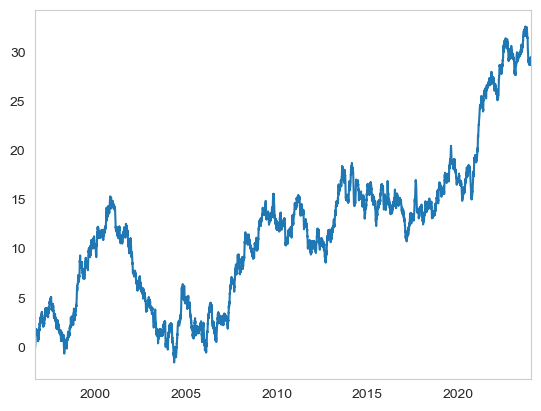

In [20]:
dual_ret = regime.dual_regime(10000, 0.1)
dual_ret.rets.cumsum().plot()
plt.grid(False)

In [21]:
_, data = regime.prep_data()

In [8]:
_

,rets,flags,target,target_rets,pmodel,prets,rets2,rets3,regime
2021-05-10,0.054948,0,1.0,0.293714,1,0.000000,-0.049532,0.201858,0.0
2021-05-11,0.293714,0,0.0,-0.182796,1,0.293714,0.054948,-0.049532,0.0
2021-05-13,0.051577,0,1.0,0.284362,1,0.000000,-0.182796,0.293714,0.0
2021-05-14,0.284362,0,0.0,-0.209269,1,0.284362,0.051577,-0.182796,0.0
2021-05-17,0.158952,0,0.0,-0.165134,1,0.000000,-0.167063,-0.209269,0.0
...,...,...,...,...,...,...,...,...,...
2024-01-04,0.021760,0,1.0,0.068985,1,0.021760,0.225324,0.230439,0.0
2024-01-05,0.068985,0,1.0,0.148334,1,0.068985,0.021760,0.225324,0.0
2024-01-06,0.148334,0,1.0,0.279627,1,0.148334,0.068985,0.021760,0.0
2024-01-07,0.279627,0,1.0,0.121019,1,0.279627,0.148334,0.068985,0.0


In [22]:
data

,rets,flags,target,target_rets,pmodel,prets,rets2,rets3,regime
1996-09-07,0.081623,0,1.0,0.116585,1,0.000000,NaN,NaN,NaN
1996-09-08,0.116585,0,1.0,0.039707,1,0.116585,0.081623,NaN,NaN
1996-09-09,0.039707,0,0.0,-0.013805,1,0.039707,0.116585,0.081623,NaN
1996-09-10,-0.013805,0,1.0,0.128210,0,-0.013805,0.039707,0.116585,NaN
1996-09-11,0.128210,0,1.0,0.273271,1,0.000000,-0.013805,0.039707,NaN
...,...,...,...,...,...,...,...,...,...
2024-01-07,-0.049930,0,1.0,0.058200,0,-0.000000,-0.127159,0.021590,0.0
2024-01-08,0.058200,0,1.0,0.129737,1,0.000000,-0.049930,-0.127159,0.0
2024-01-09,0.129737,0,0.0,-0.013831,1,0.129737,0.058200,-0.049930,0.0
2024-01-10,-0.013831,0,0.0,-0.089406,0,-0.013831,0.129737,0.058200,0.0
